https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview
## LearnPlatform COVID-19 Impact on Digital Learning
Use digital learning data to analyze the impact of COVID-19 on student learning

### Problem Statement
The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

#Challenges
We challenge the Kaggle community to explore (1) the state of digital learning in 2020 and (2) how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

#
pct_black/hispanic-Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
pct_free/reduced-Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
countyconnectionsratio-ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based
on the county level data from FCC From 477 (December 2018 version)
pptotalraw-Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource
Database on Schools (NERD$) project.
The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

In [106]:
# Import Libraries

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [108]:
# Read tables(.csv file)

In [109]:
product_df = pd.read_csv('products_info.csv')
product_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [110]:
districts_df = pd.read_csv('districts_info.csv')
districts_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


### EDA of districts_info.csv table 

In [111]:
# shape of dataframe
districts_df.shape

(233, 7)

In [112]:
# info() function gives number of entries ,column names,number of non null values and data type 
districts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


<AxesSubplot:>

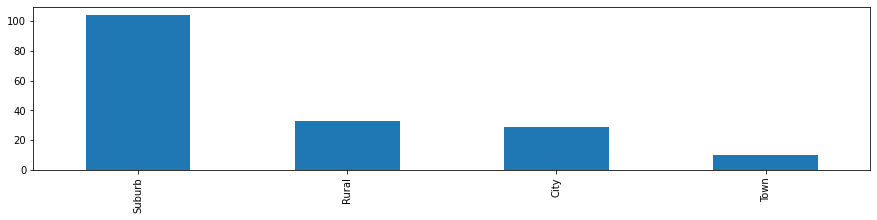

In [113]:
# bar plot gives frequency of data w.r.t category of feature
districts_df['locale'].value_counts().plot(kind='bar')

In [212]:
# isna() return Nan value of each column in True or False, sum() function return sum of Nan value
districts_df.isna().sum()

state                       57
locale                      57
pct_black                    0
hispanic                     0
pct_free                     0
reduced                      0
Country1                     0
Country2                     0
local_exp                    0
federal_exp                  0
pct_black/hispanic           0
pct_free/reduced             0
county_connections_ratio     0
pp_total_raw                 0
dtype: int64

In [214]:
# Describe() function gives count, min, max, median, quantile range value, std of int or float feature
districts_df.describe()

,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
count,233.000000,233.000000,233.000000,233.000000,2.330000e+02,233.000000,233.000000,233.000000,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02
mean,0.250948,-1.207531,0.239189,0.425397,-5.090059e+13,0.001609,9.310152,9.477065,-2.078195e-01,5.622725e-01,-3.163765e+16,9.823877e-01
std,0.277720,0.474722,0.168828,0.053237,1.212429e+13,0.002462,0.174215,0.147179,6.675679e-16,1.780181e-15,5.612056e+01,2.113965e-15
min,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.000000,9.004017,9.218815,-2.078195e-01,5.622725e-01,-3.163765e+16,9.823877e-01
25%,0.000000,-1.609438,0.200000,0.400000,-5.885817e+13,0.000000,9.210340,9.392662,-2.078195e-01,5.622725e-01,-3.163765e+16,9.823877e-01
50%,0.373862,-1.079478,0.239189,0.439189,-5.885817e+13,0.000000,9.347889,9.508560,-2.078195e-01,5.622725e-01,-3.163765e+16,9.823877e-01
75%,0.447214,-0.916291,0.239189,0.439189,-3.357287e+13,0.005100,9.347889,9.508560,-2.078195e-01,5.622725e-01,-3.163765e+16,9.823877e-01
max,0.894427,0.000000,0.800000,0.497973,0.000000e+00,0.012751,9.554212,9.682407,-2.078195e-01,5.622725e-01,-3.163765e+16,9.823877e-01


<AxesSubplot:>

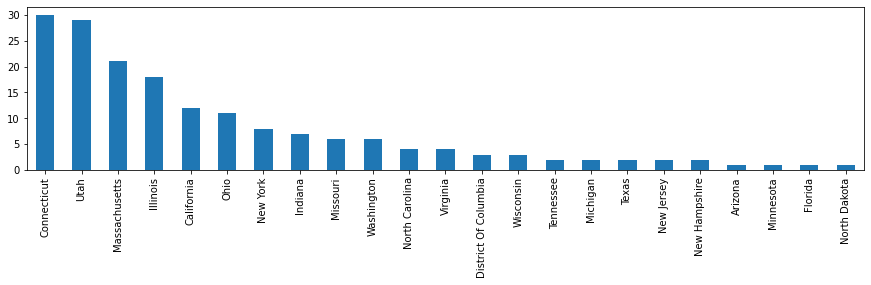

In [116]:
districts_df['state'].value_counts().plot(kind='bar')

In [117]:
districts_df['state'].isnull().sum()

57

In [120]:
districts_df['pct_black/hispanic'] = districts_df['pct_black/hispanic'].str.strip('[')
districts_df[['pct_black', 'hispanic']] = districts_df['pct_black/hispanic'].str.split(',', expand=True)
districts_df[['pct_black', 'hispanic']].head()

,pct_black,hispanic
0,0,0.2
1,NaN,NaN
2,0,0.2
3,NaN,NaN
4,NaN,NaN


In [121]:
districts_df['pct_free/reduced'] = districts_df['pct_free/reduced'].str.strip('[')
districts_df[['pct_free','reduced']] = districts_df['pct_free/reduced'].str.split(',', expand=True)
districts_df[['pct_free','reduced']].head()

,pct_free,reduced
0,0,0.2
1,NaN,NaN
2,0.2,0.4
3,NaN,NaN
4,NaN,NaN


In [122]:
districts_df['county_connections_ratio'] = districts_df['county_connections_ratio'].str.strip('[')
districts_df[['Country1','Country2']] =districts_df['county_connections_ratio'].str.split(',', expand=True)
districts_df[['Country1','Country2']].head()

,Country1,Country2
0,0.18,1
1,NaN,NaN
2,0.18,1
3,NaN,NaN
4,NaN,NaN


In [123]:
districts_df['pp_total_raw'] = districts_df['pp_total_raw'].str.strip('[')
districts_df[['local_exp','federal_exp']] = districts_df['pp_total_raw'].str.split(',', expand=True)
districts_df[['local_exp','federal_exp']].head()

,local_exp,federal_exp
0,14000,16000
1,NaN,NaN
2,6000,8000
3,NaN,NaN
4,NaN,NaN


In [124]:
df= districts_df.drop(['district_id','pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw'],axis=1)
df.head()

,state,locale,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp
0,Illinois,Suburb,0,0.2,0,0.2,0.18,1,14000,16000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Utah,Suburb,0,0.2,0.2,0.4,0.18,1,6000,8000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        176 non-null    object
 1   locale       176 non-null    object
 2   pct_black    176 non-null    object
 3   hispanic     176 non-null    object
 4   pct_free     148 non-null    object
 5   reduced      148 non-null    object
 6   Country1     162 non-null    object
 7   Country2     162 non-null    object
 8   local_exp    118 non-null    object
 9   federal_exp  118 non-null    object
dtypes: object(10)
memory usage: 18.3+ KB


In [126]:
df['hispanic']=pd.to_numeric(df['hispanic'])
df['pct_black']=pd.to_numeric(df['pct_black'])
df['reduced']=pd.to_numeric(df['reduced'])
df['pct_free']=pd.to_numeric(df['pct_free'])
df['Country1']=pd.to_numeric(df['Country1'])
df['Country2']=pd.to_numeric(df['Country2'])
df['local_exp']=pd.to_numeric(df['local_exp'])
df['federal_exp']=pd.to_numeric(df['federal_exp'])
df.head()

,state,locale,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp
0,Illinois,Suburb,0.0,0.2,0.0,0.2,0.18,1.0,14000.0,16000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Utah,Suburb,0.0,0.2,0.2,0.4,0.18,1.0,6000.0,8000.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### column - 'hispanic'

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hispanic', ylabel='Density'>

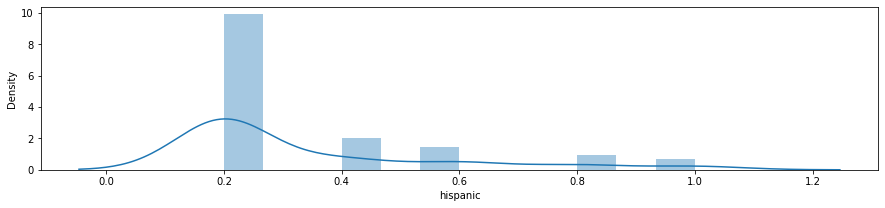

In [127]:
sns.distplot(df['hispanic'])  

In [128]:
# fill missing value by mean
df['hispanic']= df['hispanic'].fillna(df['hispanic'].mean())

In [129]:
# Handle skew(), normalize value by logarithmic fun
df['hispanic'].skew()
df['hispanic'] =np.log(df['hispanic'])

<AxesSubplot:>

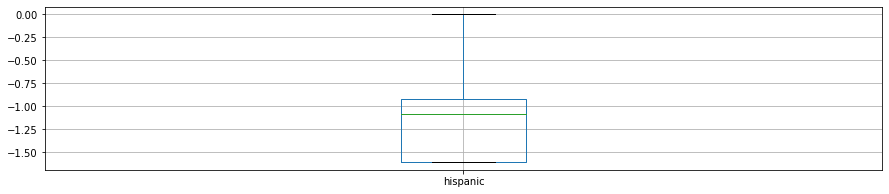

In [130]:
df.boxplot(column='hispanic')

### column = 'pct_black'

In [131]:
df['pct_black']=pd.to_numeric(df['pct_black'])
df['pct_black'].value_counts()

0.0    116
0.2     24
0.4     17
0.6     11
0.8      8
Name: pct_black, dtype: int64

<AxesSubplot:>

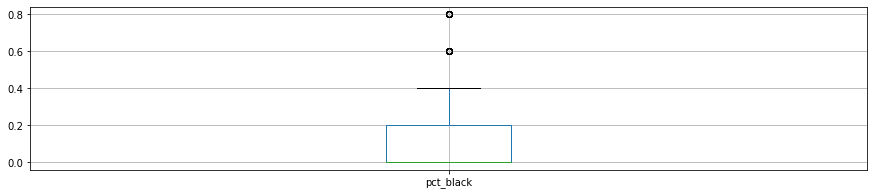

In [132]:
df.boxplot(column='pct_black')

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_black', ylabel='Density'>

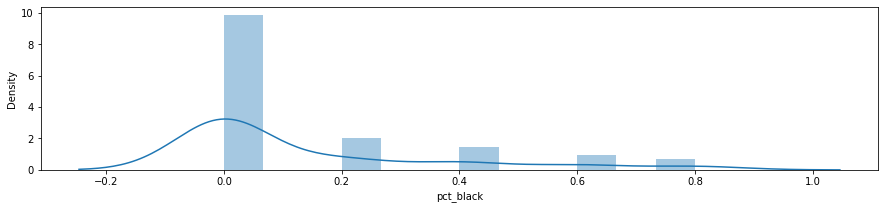

In [133]:
df['pct_black'].isnull().sum()
sns.distplot(df['pct_black'])

In [134]:
df['pct_black']= df['pct_black'].fillna(df['pct_black'].mean())
df['pct_black'].isnull().sum()

0

In [135]:
df['pct_black'].skew()

1.8152645131729424

In [136]:
df['pct_black']=np.sqrt(df[['pct_black']])
df['pct_black'].skew()

0.6310460871594203

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_black', ylabel='Density'>

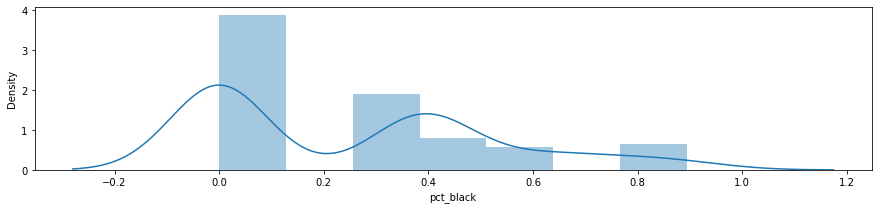

In [137]:
sns.distplot(df['pct_black'])

## column = 'reduced'

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reduced', ylabel='Density'>

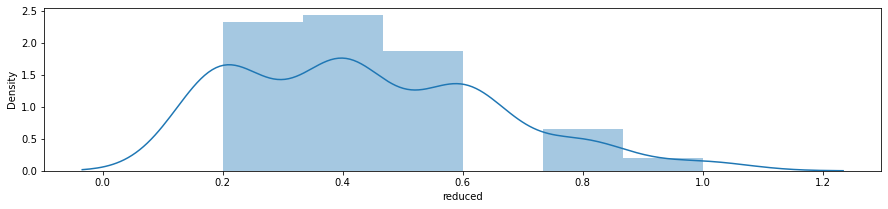

In [138]:
sns.distplot(df['reduced'])

In [139]:
df['reduced'].isnull().sum()

85

In [140]:
df['reduced']=df['reduced'].fillna(df['reduced'].mean())
df['reduced'].isnull().sum()

0

<AxesSubplot:>

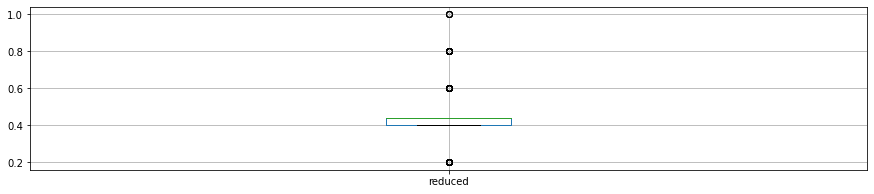

In [141]:
df.boxplot(column='reduced')

In [142]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    return lower,upper

In [143]:
lower,upper = remove_outlier(df['reduced'])
df['reduced']=np.where(df['reduced']>upper,upper,df['reduced'])
df['reduced']=np.where(df['reduced']<lower,lower,df['reduced'])

<AxesSubplot:>

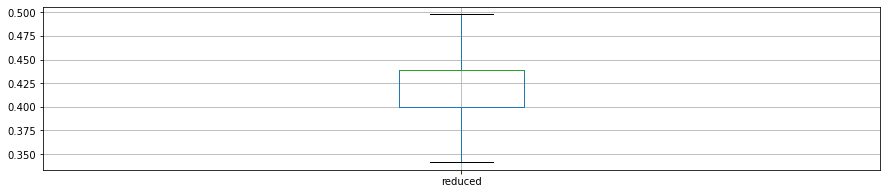

In [144]:
df.boxplot(column='reduced')

### column = 'pct_free'

In [145]:
df['pct_free'].isnull().sum()

85

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_free', ylabel='Density'>

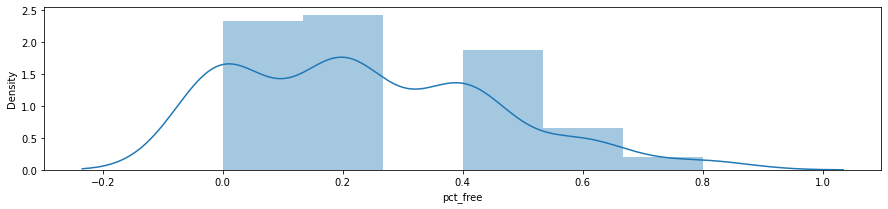

In [146]:
sns.distplot(df['pct_free'])

In [147]:
df['pct_free']=df['pct_free'].fillna(df['pct_free'].mean())

In [148]:
df['pct_free'].skew()

0.7568043178867595

<AxesSubplot:>

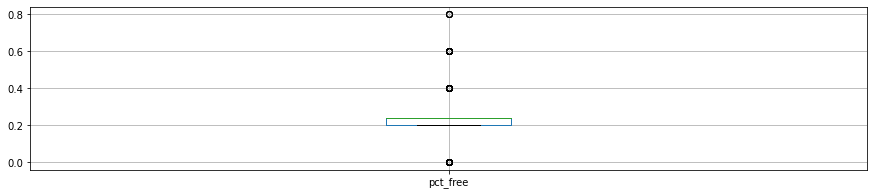

In [149]:
df.boxplot(column='pct_free')

### column = 'Country1'

In [150]:
df['Country1'].isnull().sum()

71

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Country1', ylabel='Density'>

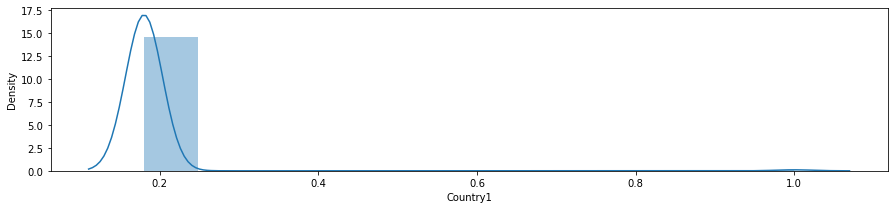

In [151]:
sns.distplot(df['Country1'])

In [152]:
df['Country1']=df['Country1'].fillna(df['Country1'].mean())
df['Country1'].isnull().sum()

0

In [153]:
df['Country1'].skew()

15.220799703687717

In [154]:
from scipy import stats
norm1=stats.boxcox(df['Country1'])[0]
pd.Series(norm1).skew()

1.0248936315920905

In [155]:
df['Country1']=stats.boxcox(df['Country1'])[0]

<AxesSubplot:>

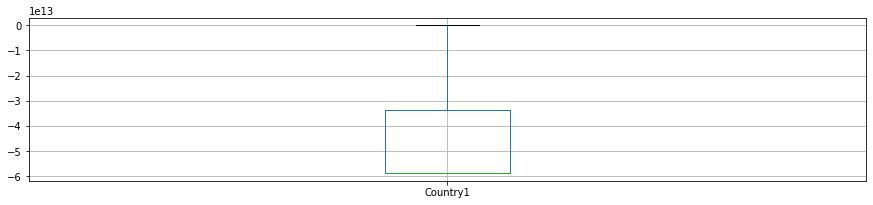

In [156]:
df.boxplot(column='Country1')

### column = 'Country2'

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Country2', ylabel='Density'>

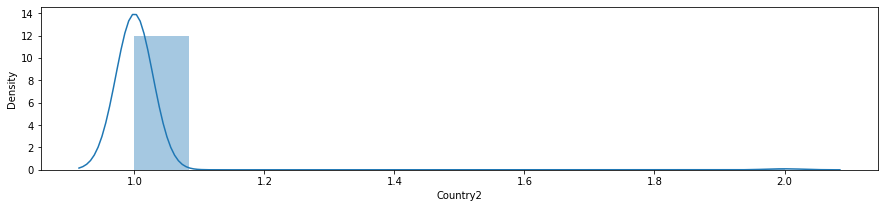

In [157]:
sns.distplot(df['Country2'])

In [158]:
df['Country2'].isnull().sum()

71

In [159]:
df['Country2'] = df['Country2'].fillna(df['Country2'].mean())
df['Country2'].isnull().sum()

0

In [160]:
df['Country2'].skew()

15.220799703687696

In [161]:
from scipy import stats
norm2=stats.boxcox(df['Country2'])[0]
pd.Series(norm2).skew()

1.391328142593772

In [162]:
df['Country2'] = stats.boxcox(df['Country2'])[0]

<AxesSubplot:>

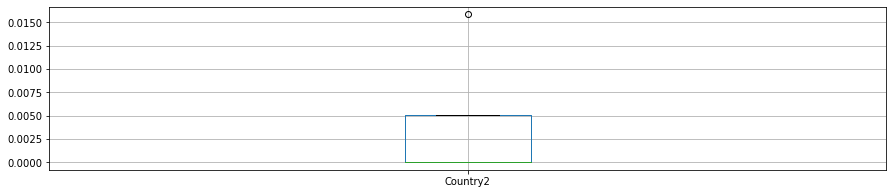

In [163]:
df.boxplot(column='Country2')

<AxesSubplot:>

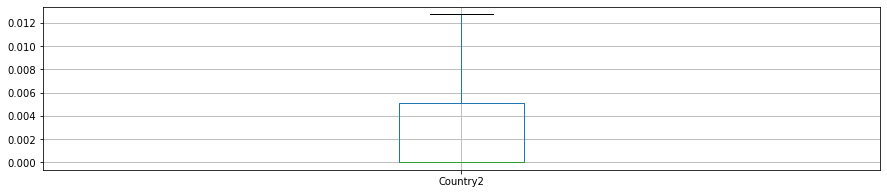

In [164]:
lower,upper = remove_outlier(df['Country2'])
df['Country2']=np.where(df['Country2']>upper,upper,df['Country2'])
df.boxplot(column='Country2')

### column = 'local_exp'

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='local_exp', ylabel='Density'>

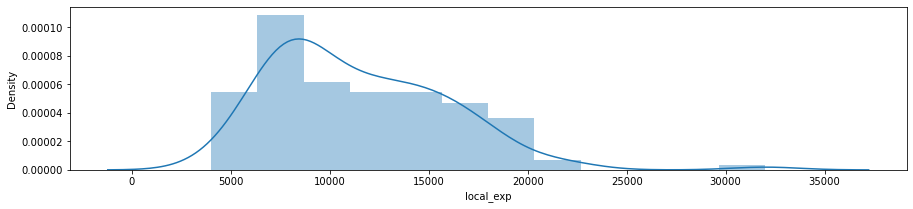

In [165]:
sns.distplot(df['local_exp'])

In [166]:
df['local_exp'].isnull().sum()

115

In [167]:
df['local_exp']= df['local_exp'].fillna(df['local_exp'].mean())
df['local_exp'].isnull().sum()

0

In [168]:
df['local_exp'].skew()

1.521274177619339

In [169]:
df['local_exp'] = np.log(df['local_exp'])
df['local_exp'].skew()

-0.4170396865514301

<AxesSubplot:>

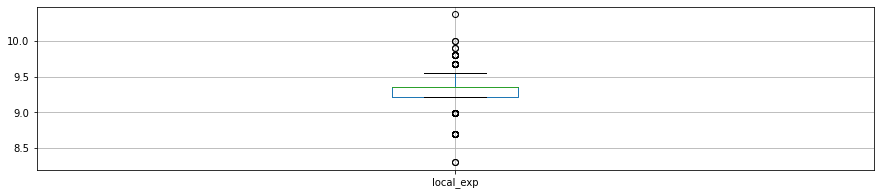

In [170]:
df.boxplot(column='local_exp')

<AxesSubplot:>

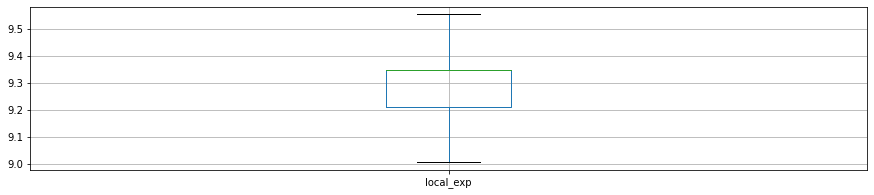

In [171]:
lower,upper = remove_outlier(df['local_exp'])
df['local_exp']=np.where(df['local_exp']>upper,upper,df['local_exp'])
df['local_exp']=np.where(df['local_exp']<lower,lower,df['local_exp'])
df.boxplot(column='local_exp')

### column = 'federal_exp'

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='federal_exp', ylabel='Density'>

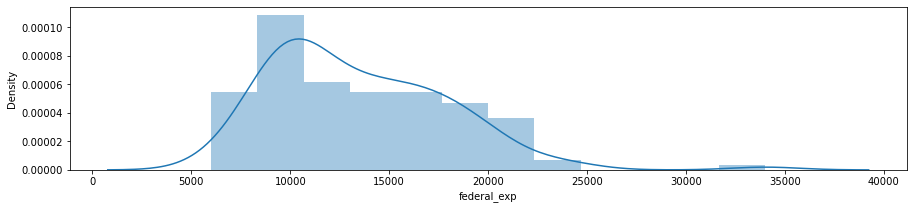

In [172]:
sns.distplot(df['federal_exp'])

In [173]:
df['federal_exp'].isnull().sum()

115

In [174]:
df['federal_exp']=df['federal_exp'].fillna(df['federal_exp'].mean())
df['federal_exp'].isnull().sum()

0

In [175]:
df['federal_exp'].skew()

1.521274177619339

In [176]:
df['federal_exp'] = np.log(df['federal_exp'])
df['federal_exp'].skew()

-0.1537047755278455

<AxesSubplot:>

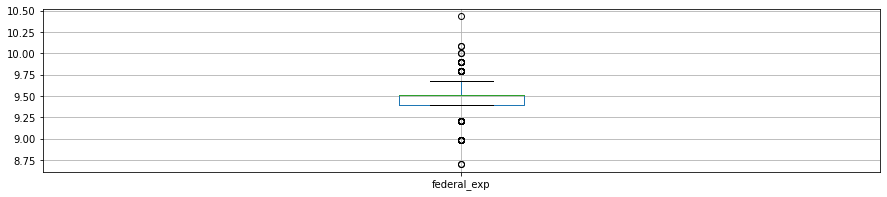

In [177]:
df.boxplot(column='federal_exp')

<AxesSubplot:>

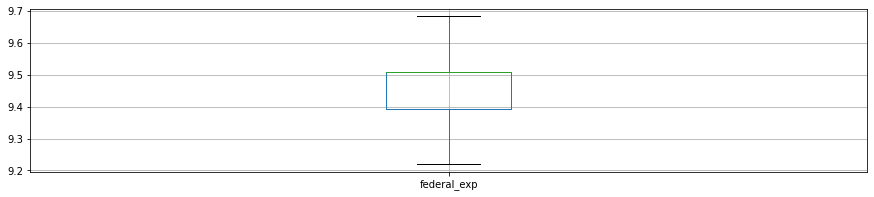

In [178]:
lower,upper = remove_outlier(df['federal_exp'])
df['federal_exp']=np.where(df['federal_exp']>upper,upper,df['federal_exp'])
df['federal_exp']=np.where(df['federal_exp']<lower,lower,df['federal_exp'])
df.boxplot(column='federal_exp')

In [180]:
districts_df = df.copy()
districts_df.head()

,state,locale,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp
0,Illinois,Suburb,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.0000,9.546813,9.680344
1,NaN,NaN,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560
2,Utah,Suburb,0.000000,-1.609438,0.200000,0.400000,-5.885817e+13,0.0000,9.004017,9.218815
3,NaN,NaN,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560
4,NaN,NaN,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560


## districts_df

In [182]:
df_state= districts_df.groupby('state')
df_state.first()

,locale,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp
state,,,,,,,,,
Arizona,City,0.894427,0.000000,0.239189,0.439189,-5.885817e+13,0.000000,9.347889,9.508560
California,Suburb,0.632456,-0.510826,0.200000,0.400000,-5.885817e+13,0.000000,9.347889,9.508560
Connecticut,Rural,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.000000,9.347889,9.508560
District Of Columbia,City,0.894427,0.000000,0.239189,0.439189,-5.885817e+13,0.000000,9.554212,9.682407
Florida,Suburb,0.632456,-0.510826,0.400000,0.497973,-5.885817e+13,0.000000,9.004017,9.218815
Illinois,Suburb,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.000000,9.546813,9.680344
Indiana,City,0.894427,0.000000,0.800000,0.497973,-5.885817e+13,0.000000,9.004017,9.218815
Massachusetts,Suburb,0.000000,-1.609438,0.239189,0.439189,-3.357287e+13,0.005100,9.554212,9.682407
Michigan,Suburb,0.632456,-0.510826,0.600000,0.497973,-5.885817e+13,0.000000,9.210340,9.392662


In [183]:
#pct_black/hispanic	pct_free/reduced	county_connections_ratio	pp_total_raw
districts_df['pct_black/hispanic'] = districts_df.pct_black.sum()/districts_df.hispanic.sum()

In [184]:
districts_df['pct_free/reduced']=districts_df.pct_free.sum()/districts_df.reduced.sum()

In [185]:
districts_df['county_connections_ratio']=districts_df.Country1.sum()/districts_df.Country2.sum()

In [186]:
districts_df['pp_total_raw']=districts_df.local_exp.sum()/districts_df.federal_exp.sum()

In [187]:
districts_df.head()

,state,locale,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,Illinois,Suburb,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.0000,9.546813,9.680344,-0.207819,0.562272,-3.163765e+16,0.982388
1,NaN,NaN,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560,-0.207819,0.562272,-3.163765e+16,0.982388
2,Utah,Suburb,0.000000,-1.609438,0.200000,0.400000,-5.885817e+13,0.0000,9.004017,9.218815,-0.207819,0.562272,-3.163765e+16,0.982388
3,NaN,NaN,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560,-0.207819,0.562272,-3.163765e+16,0.982388
4,NaN,NaN,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560,-0.207819,0.562272,-3.163765e+16,0.982388


In [188]:
# data for state 'Utah'
data = districts_df.drop(['pct_black','hispanic','pct_free','reduced','Country1','Country2','local_exp','federal_exp'],axis=1)
data

,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,Illinois,Suburb,-0.207819,0.562272,-3.163765e+16,0.982388
1,NaN,NaN,-0.207819,0.562272,-3.163765e+16,0.982388
2,Utah,Suburb,-0.207819,0.562272,-3.163765e+16,0.982388
3,NaN,NaN,-0.207819,0.562272,-3.163765e+16,0.982388
4,NaN,NaN,-0.207819,0.562272,-3.163765e+16,0.982388
...,...,...,...,...,...,...
228,New York,Rural,-0.207819,0.562272,-3.163765e+16,0.982388
229,Tennessee,Rural,-0.207819,0.562272,-3.163765e+16,0.982388
230,Virginia,Rural,-0.207819,0.562272,-3.163765e+16,0.982388
231,California,City,-0.207819,0.562272,-3.163765e+16,0.982388


In [189]:
# Here we get statewise sum of each ratio, we can compare one state to another state for each ratio  
state_data = data.groupby('state')[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].sum()
state_data.sort_values('pp_total_raw')

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
state,,,,
Arizona,-0.207819,0.562272,-3.163765e+16,0.982388
North Dakota,-0.207819,0.562272,-3.163765e+16,0.982388
Florida,-0.207819,0.562272,-3.163765e+16,0.982388
Minnesota,-0.207819,0.562272,-3.163765e+16,0.982388
Texas,-0.415639,1.124545,-6.327530e+16,1.964775
Tennessee,-0.415639,1.124545,-6.327530e+16,1.964775
New Jersey,-0.415639,1.124545,-6.327530e+16,1.964775
Michigan,-0.415639,1.124545,-6.327530e+16,1.964775
New Hampshire,-0.415639,1.124545,-6.327530e+16,1.964775


<AxesSubplot:title={'center':'pp_total_raw'}, xlabel='state'>

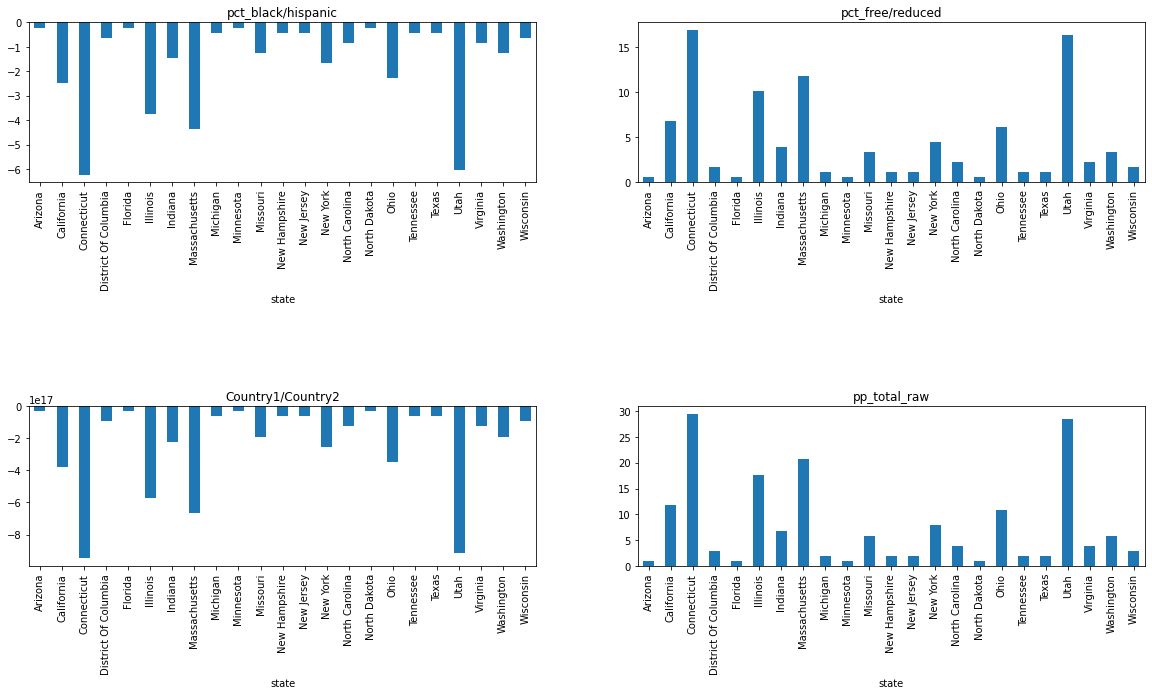

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.title('pct_black/hispanic')
state_data['pct_black/hispanic'].plot(kind='bar')
plt.subplot(3,2,2)
plt.title('pct_free/reduced')
state_data['pct_free/reduced'].plot(kind='bar')
plt.subplot(3,2,5)
plt.title('Country1/Country2')
state_data['county_connections_ratio'].plot(kind='bar')
plt.subplot(3,2,6)
plt.title('pp_total_raw')
state_data['pp_total_raw'].plot(kind='bar')

In [221]:
local_data = data.groupby('locale')[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].sum()
local_data.sort_values('pp_total_raw')

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
locale,,,,
Town,-2.078195,5.622725,-3.163765e+17,9.823877
City,-6.026765,16.305902,-9.174918e+17,28.489242
Rural,-6.858043,18.554992,-1.044042e+18,32.418793
Suburb,-21.613227,58.476339,-3.290316e+18,102.168316


<AxesSubplot:ylabel='locale'>

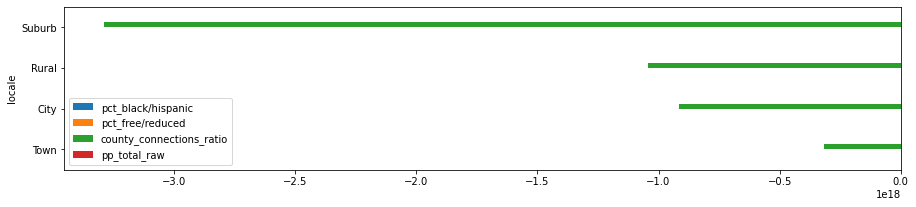

In [223]:
local_data.sort_values('pp_total_raw').plot(kind='barh')

## product_info.csv

In [191]:
product_df = pd.read_csv('products_info.csv')
product_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [192]:
product_df.shape

(372, 6)

In [193]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


<AxesSubplot:>

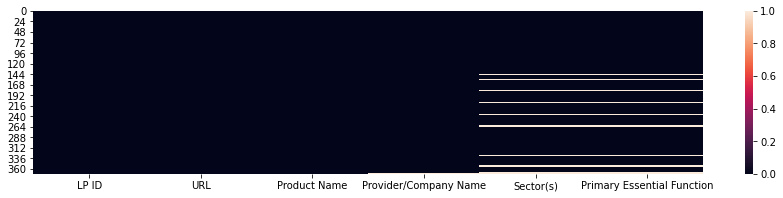

In [195]:
sns.heatmap(data=product_df.isnull())

In [196]:
product_df.dropna(inplace=True)
product_df.isnull().sum()

LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64

In [197]:
#Data_new.to_csv("covid19_PandasProfiles.csv")

data['Sector(s)']=product_df['Sector(s)'].copy()

In [198]:
# Merge two tables/Dataframe
merge_df =data.merge(product_df,on='Sector(s)')

In [199]:
merge_df.head()

,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,Sector(s),LP ID,URL,Product Name,Provider/Company Name,Primary Essential Function
0,Illinois,Suburb,-0.207819,0.562272,-3.163765e+16,0.982388,PreK-12,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms
1,Illinois,Suburb,-0.207819,0.562272,-3.163765e+16,0.982388,PreK-12,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms
2,Illinois,Suburb,-0.207819,0.562272,-3.163765e+16,0.982388,PreK-12,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC","LC - Sites, Resources & Reference - Games & Si..."
3,Illinois,Suburb,-0.207819,0.562272,-3.163765e+16,0.982388,PreK-12,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC - Digital Learning Platforms
4,Illinois,Suburb,-0.207819,0.562272,-3.163765e+16,0.982388,PreK-12,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,LC - Digital Learning Platforms


In [220]:
merge_df['Product Name'].value_counts().head()

iCivics                112
Breakout EDU           112
Scratch                112
Mr. Donn               112
TeachersPayTeachers    112
Name: Product Name, dtype: int64

In [201]:
prov_comp_name = merge_df.groupby('Provider/Company Name')[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].sum()
prov_comp_name.sort_values('pp_total_raw').head()

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
Provider/Company Name,,,,
Weebly,-0.207819,0.562272,-3.163765e+16,0.982388
Qualtrics,-0.207819,0.562272,-3.163765e+16,0.982388
"A&E Television Networks, LLC",-9.144057,24.739989,-1.392057e+18,43.225057
"Nature America, Inc",-9.144057,24.739989,-1.392057e+18,43.225057
Michael Dayah,-9.144057,24.739989,-1.392057e+18,43.225057


<AxesSubplot:ylabel='Provider/Company Name'>

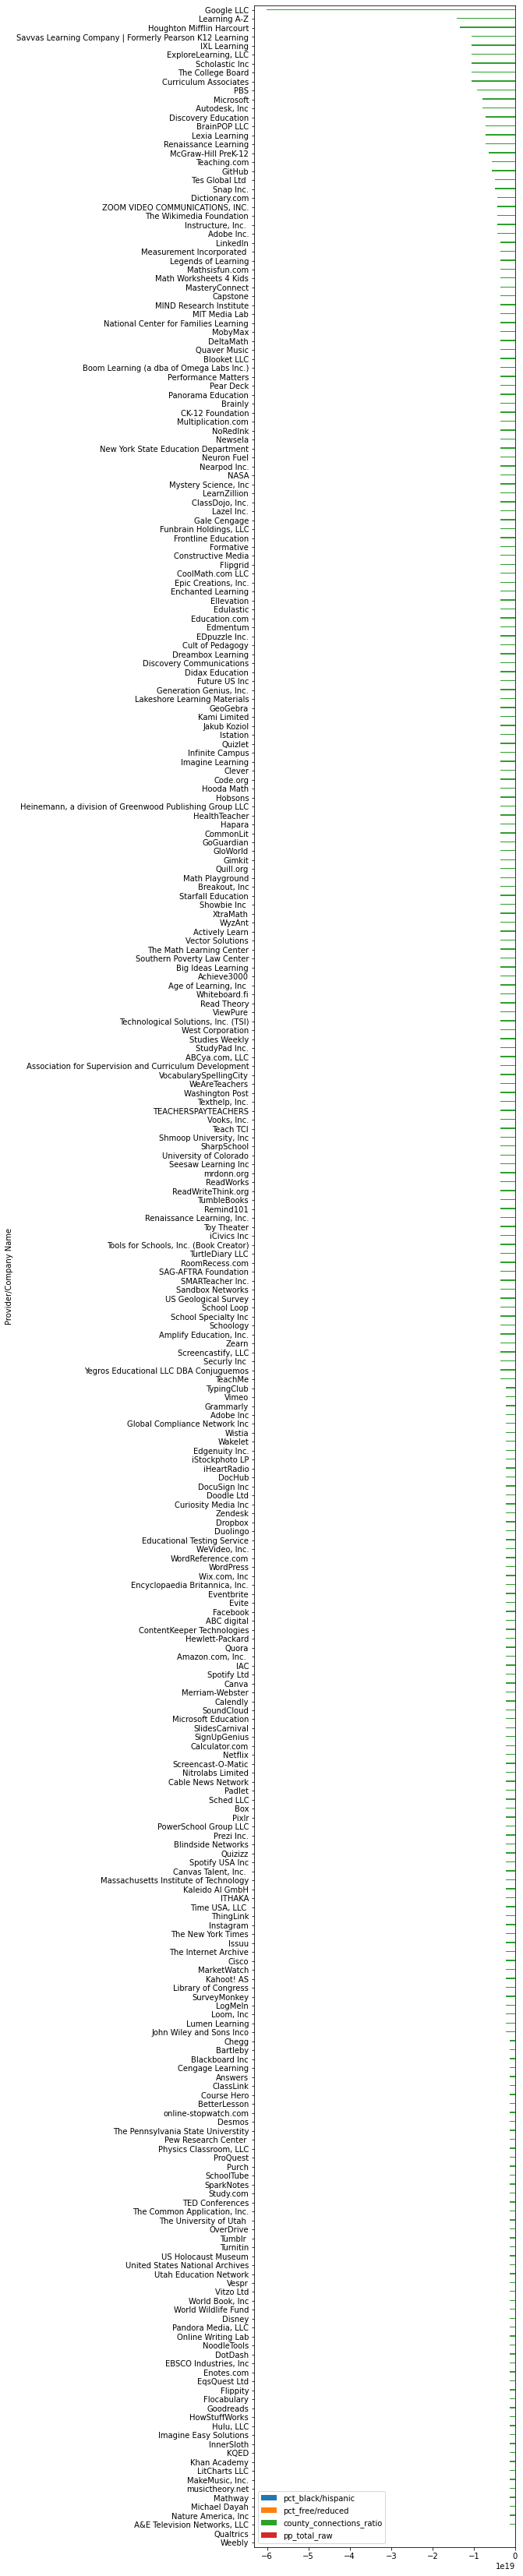

In [202]:
plt.rcParams["figure.figsize"]=(6,60)
prov_comp_name.sort_values('pp_total_raw').plot(kind='barh')

In [203]:
product_name = merge_df.groupby('Product Name')[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].sum()
product_name.sort_values('pp_total_raw').head()

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
Product Name,,,,
Qualtrics,-0.207819,0.562272,-3.163765e+16,0.982388
Weebly,-0.207819,0.562272,-3.163765e+16,0.982388
TES,-9.144057,24.739989,-1.392057e+18,43.225057
TedEd,-9.144057,24.739989,-1.392057e+18,43.225057
The Physics Classroom,-9.144057,24.739989,-1.392057e+18,43.225057


<AxesSubplot:xlabel='Product Name'>

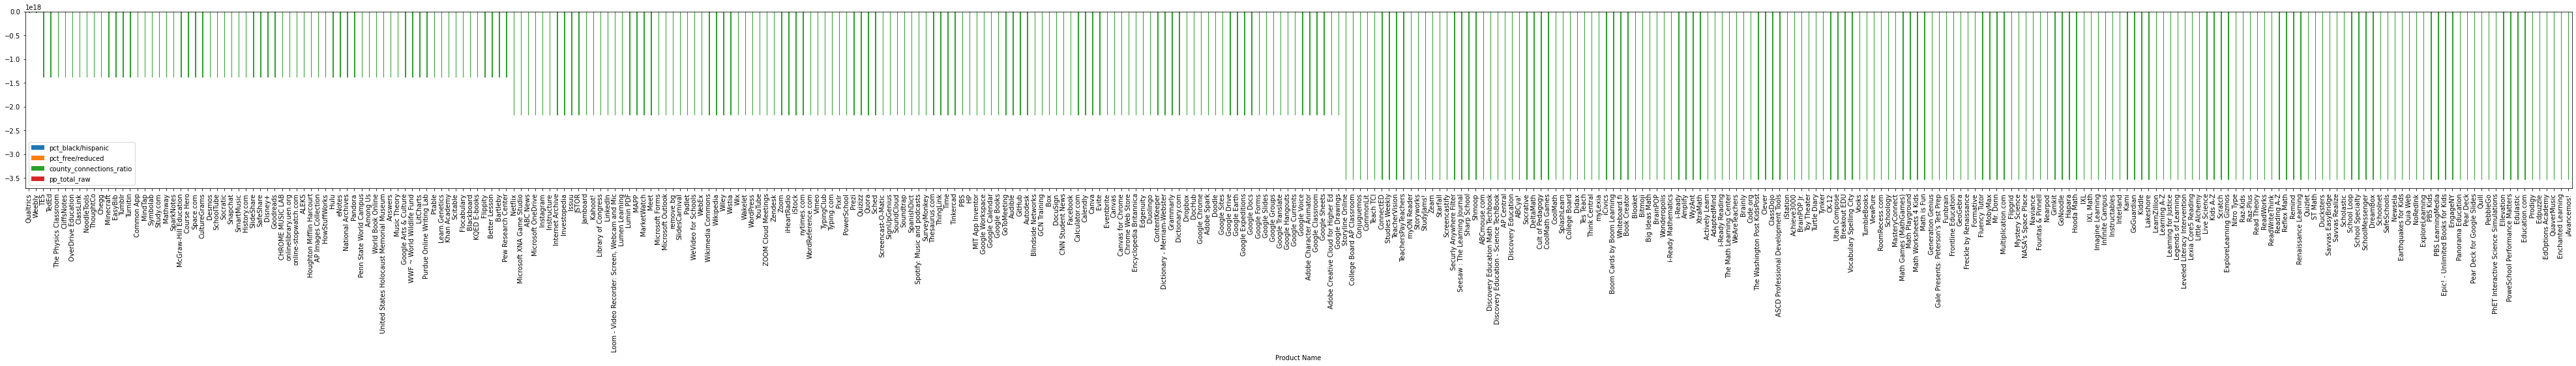

In [204]:
plt.rcParams["figure.figsize"]=(70,5)
product_name.sort_values('pp_total_raw').plot(kind='bar')

In [205]:
URL_name = merge_df.groupby('URL')[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].sum()
URL_name.sort_values('pp_total_raw').head()
url = URL_name.sample(100)
url.head()

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
URL,,,,
https://www-k6.thinkcentral.com/ePC/start.do,-23.275783,62.974518,-3.543417e+18,110.027418
https://www.peardeck.com/googleslides,-23.275783,62.974518,-3.543417e+18,110.027418
http://www.mathplayground.com,-23.275783,62.974518,-3.543417e+18,110.027418
http://www.readinga-z.com,-23.275783,62.974518,-3.543417e+18,110.027418
https://www.zendesk.com/,-14.339545,38.796802,-2.182998e+18,67.784748


<AxesSubplot:xlabel='URL'>

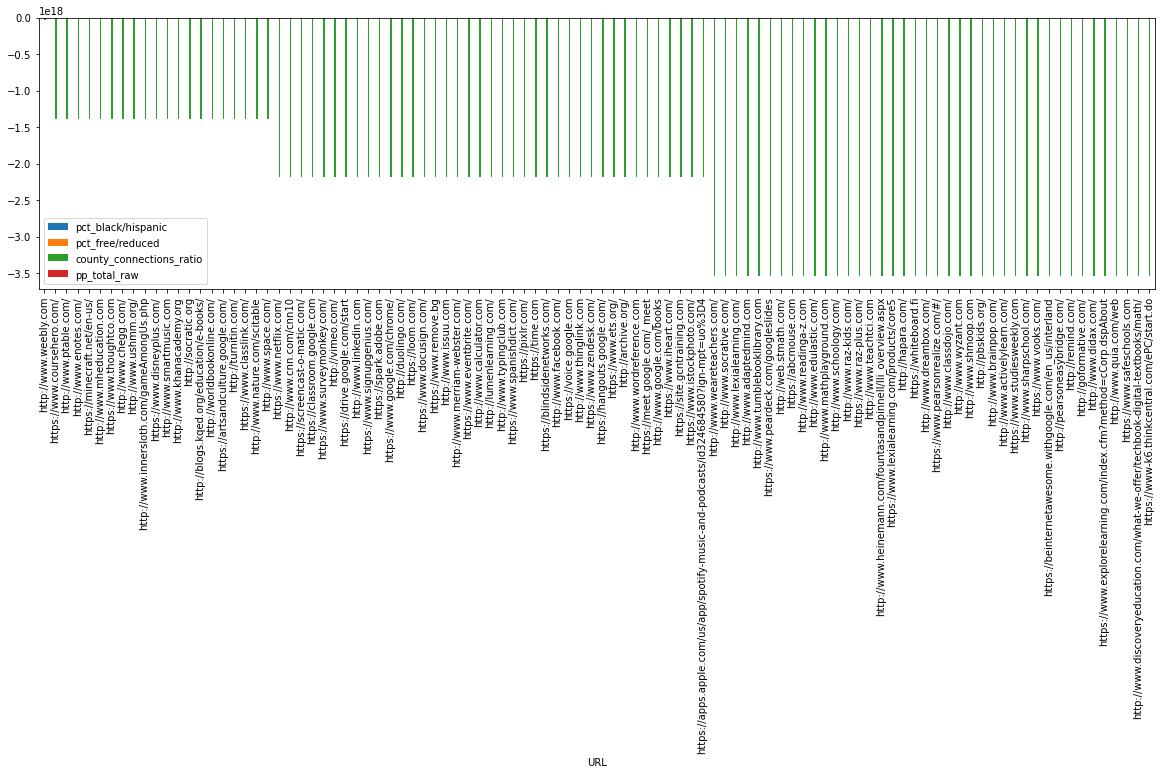

In [206]:
plt.rcParams["figure.figsize"] = (20,5)
url.sort_values('pp_total_raw').plot(kind='bar')

In [207]:
Primary_fun = merge_df.groupby('Primary Essential Function')[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].sum()
Primary_fun.sort_values('pp_total_raw')

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
Primary Essential Function,,,,
CM - Teacher Resources - Grading & Attendance,-9.144057,24.739989,-1.392057e+18,43.225057
"SDO - Environmental, Health & Safety (EHS) Compliance",-23.275783,62.974518,-3.543417e+18,110.027418
"SDO - Admissions, Enrollment & Rostering",-23.275783,62.974518,-3.543417e+18,110.027418
LC - Study Tools - Tutoring,-23.275783,62.974518,-3.543417e+18,110.027418
"SDO - Data, Analytics & Reporting",-23.691422,64.099063,-3.606692e+18,111.992193
SDO - Other,-28.679089,77.593603,-4.365996e+18,135.569497
SDO - School Management Software - SSO,-32.419840,87.714508,-4.935473e+18,153.252475
SDO - Large-Scale & Standardized Testing,-37.615327,101.771320,-5.726415e+18,177.812166
"SDO - Data, Analytics & Reporting - Student Information Systems (SIS)",-37.615327,101.771320,-5.726415e+18,177.812166


<AxesSubplot:ylabel='Primary Essential Function'>

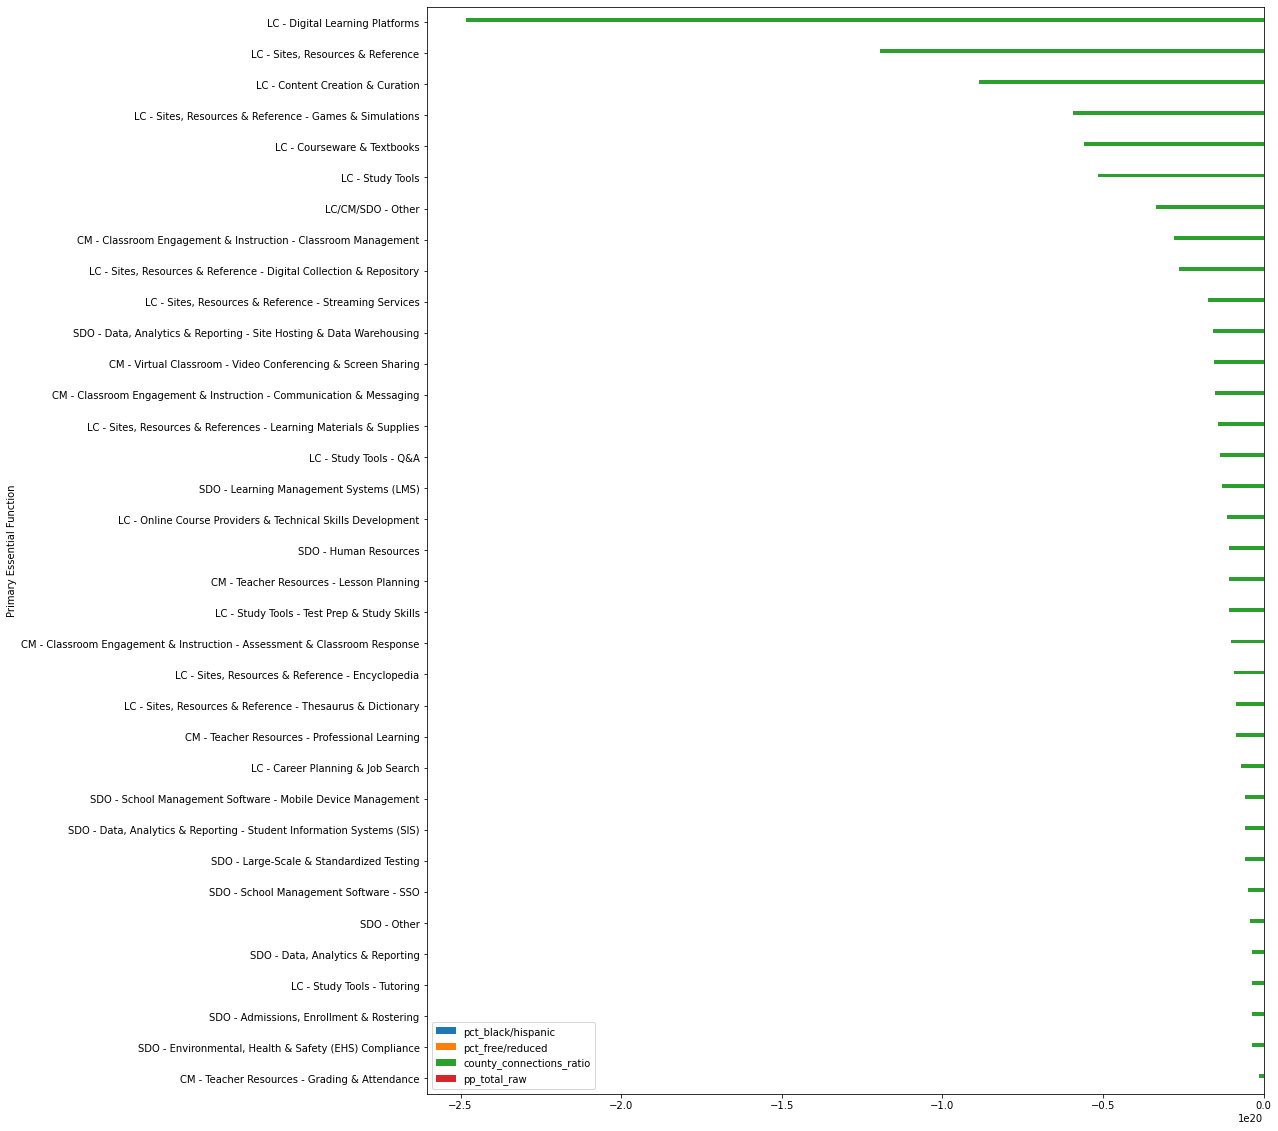

In [208]:
plt.rcParams["figure.figsize"] = (15,20)
Primary_fun.sort_values('pp_total_raw').plot(kind='barh')

In [209]:
sector_data = merge_df.groupby('Sector(s)')[['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']].sum()
sector_data.sort_values('pp_total_raw')

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
Sector(s),,,,
Corporate,-0.207819,0.562272,-3.163765e+16,0.982388
Higher Ed; Corporate,-0.207819,0.562272,-3.163765e+16,0.982388
PreK-12; Higher Ed,-594.363732,1608.099309,-9.048368e+19,2809.628704
PreK-12; Higher Ed; Corporate,-1649.047628,4461.632173,-2.510448e+20,7795.246071
PreK-12,-3956.883030,10705.668125,-6.023809e+20,18704.661020


<AxesSubplot:ylabel='Sector(s)'>

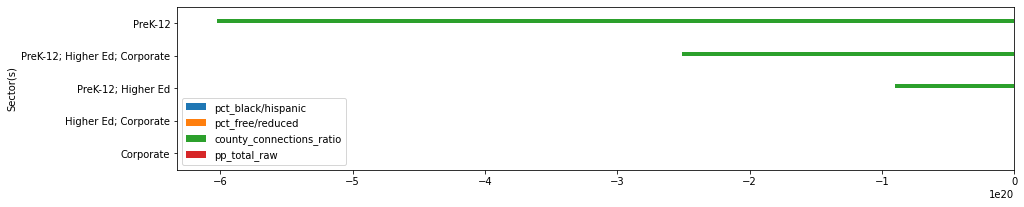

In [210]:
plt.rcParams["figure.figsize"] = (15,3)
sector_data.sort_values('pp_total_raw').plot(kind='barh')